In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np  

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split # для манипулирования данными
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
import timeit

import time
# библиотека для Aprori вариант первый 

from apriori_python import apriori
from apyori import apriori
import apyori
# насколкьо "сильные" правила мы хотим получить
# min_support -- минимальный support для правил (dtype = float).
# min_confidence -- минимальное значение confidence для правил (dtype = float)
# min_lift -- минимальный lift (dtype = float)
# max_length -- максимальная длина itemset (вспоминаем про k-itemset)  (dtype = integer)

In [ ]:
import numpy as np 

a=np.array( [[1,2,3,[1,2,3]], 1,2,3,[1,2,3,[1,2,3,[1,2,3]]] ]  )
a.ravel()
a

In [5]:
git_df = pd.read_csv('C:\\Users\\Дмитрий\\Desktop\\МАГИСТР\\Интеллектуальные_системы\\pr1\\BreadBasket_DMS.csv') # 9530

print(git_df.head(5))
git_df=git_df[['Transaction','Item']]
git_df
i=0
git_df=git_df.groupby(by=['Transaction'])['Item'].apply(','.join).reset_index()
git_df
# print(git_df)
# try: 
#     while i !=len(git_df):

#         if git_df['Transaction'][i]==git_df['Transaction'][i+1]:
#             if len(git_df['Item'][i])!=1:
#                 git_df['Item'][i]=tuple( [git_df['Item'][i]] + [git_df['Item'][i+1]])
#             else:
#                 git_df['Item'][i]=tuple( list(git_df['Item'][i]) + [git_df['Item'][i+1]])

#             git_df=git_df.drop(labels=[i+1], axis=0).reset_index(drop=True)
#         else:
#             i=i+1
# except:
#     pass    
        
# git_df

FileNotFoundError: [Errno 2] No such file or directory: 'pr1\\\\BreadBasket_DMS.csv'

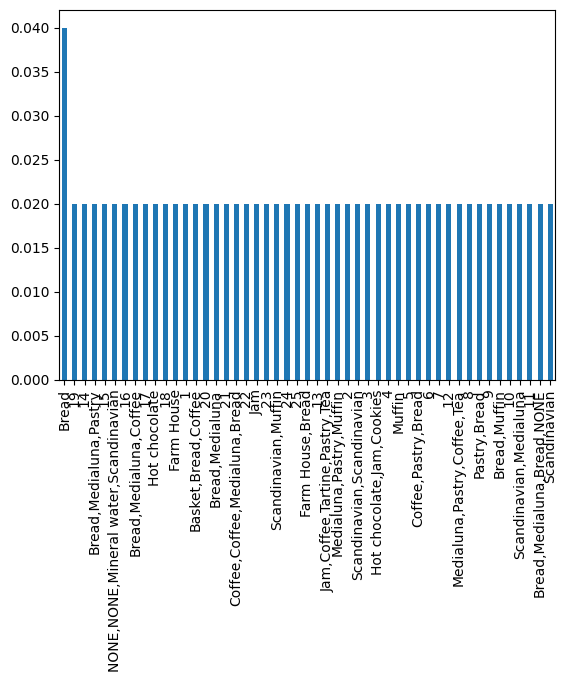

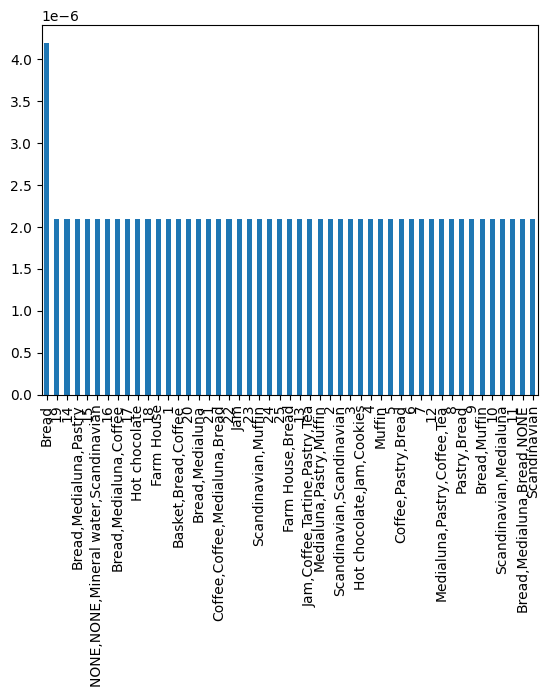

In [57]:
# df.shape[0] = Длине DF
for i in range(2):
        if i==0:
            git_df.stack()[:50].value_counts(normalize=True).plot(kind='bar') # проебразуем названия столбцов в строки (и нормализуем значения)
            plt.show()
        else:
            git_df.stack()[:50].value_counts(normalize=True).apply(lambda item: item/git_df.shape[0]).plot(kind='bar') # выводим первые 20 элементов 
            # делим значения на длину DF чтобы значения смотрелись лучше
            plt.show()

In [80]:
transactions=[]
transactions_git=[]
df= pd.DataFrame( {'mous':[ 0,1,0,1, 0, 0, 0 ,1, 0, 1, 0, 1, 0 , 1 ,  0 , 1,  1,  1 , 1,  0, 0, 0,  0 ,1 ,0 ,0, 0, 1, 1 ,1 ], 
                  'pc':[1,0,1,0,1,0,0,0,1,0,1,1,1,1,0,1,0,0,0,0,1,1,1,0,0,0,1,0,1,1],
                    'os':[1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1], 
                    'keyboard':[0,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,0,1,0,1,0,1,0],
                      'laptop':[0,0,1,1,1,1,0,0,0,1,1,1,1,1,1,0,0,1,0,1,0,0,1,0,1,0,0,1,1,1]  }
                      )
# df.stack()
print(len(git_df))
git_df=git_df[~git_df.isna()]


for i in range(df.shape[0]):
        row = df.iloc[i].dropna().tolist() # удаляем пусные значения в строке и превращаем ее в список 
        transactions.append(row)


transactions_git=git_df.values.tolist()
transactions[0] # список покупок в одном чеке
transactions_git[:10]

9531
      Transaction                                          Item
0               1                                         Bread
1               2                     Scandinavian,Scandinavian
2               3                     Hot chocolate,Jam,Cookies
3               4                                        Muffin
4               5                           Coffee,Pastry,Bread
...           ...                                           ...
9526         9680                                         Bread
9527         9681  Truffles,Tea,Spanish Brunch,Christmas common
9528         9682                Muffin,Tacos/Fajita,Coffee,Tea
9529         9683                                 Coffee,Pastry
9530         9684                                     Smoothies

[9531 rows x 2 columns]


[[1, 'Bread'],
 [2, 'Scandinavian,Scandinavian'],
 [3, 'Hot chocolate,Jam,Cookies'],
 [4, 'Muffin'],
 [5, 'Coffee,Pastry,Bread'],
 [6, 'Medialuna,Pastry,Muffin'],
 [7, 'Medialuna,Pastry,Coffee,Tea'],
 [8, 'Pastry,Bread'],
 [9, 'Bread,Muffin'],
 [10, 'Scandinavian,Medialuna']]

# Различные версии алгоритма в различных библиотеках


In [59]:
time_walk= list()
from apriori_python import apriori
start_time=time.time()
t1, rules= apriori(transactions,minSup=0.1, minConf=0.2)   
end_time=time.time()-start_time
time_walk.append(end_time)

from fpgrowth_py import fpgrowth
# fpgrowth(transactions, minSupRatio=0.1,minConf=0.2 )
# fpgrowth(df, min_support=0.6, use_colnames=True)
start_time=time.time()
items, rules=fpgrowth(transactions, minSupRatio=0.1,minConf=0.6)
end_time=time.time()-start_time
time_walk.append(end_time)

# from mlxtend.frequent_patterns import fpgrowth
# start_time=time.time()
# fpgrowth(df, min_support=0.1, use_colnames=True)
# end_time=time.time()-start_time
# time_walk.append(end_time)

from efficient_apriori import apriori
start_time=time.time()
items, rules=apriori(transactions, min_support=0.1,min_confidence=0.9)

end_time=time.time()-start_time
time_walk.append(end_time)

In [60]:
time_walk_git= list()
from apriori_python import apriori
start_time=time.time()
t1, rules= apriori(transactions_git,minSup=0.1, minConf=0.2)   
end_time=time.time()-start_time
time_walk_git.append(end_time)

from fpgrowth_py import fpgrowth
# fpgrowth(transactions, minSupRatio=0.1,minConf=0.2 )
# fpgrowth(df, min_support=0.6, use_colnames=True)
start_time=time.time()
items, rules=fpgrowth(transactions_git, minSupRatio=0.1,minConf=0.6)
end_time=time.time()-start_time
time_walk_git.append(end_time)

# from mlxtend.frequent_patterns import fpgrowth
# start_time=time.time()
# fpgrowth(git_df, min_support=0.1, use_colnames=True)
# end_time=time.time()-start_time
# time_walk_git.append(end_time)

from efficient_apriori import apriori
start_time=time.time()
items, rules=apriori(transactions_git, min_support=0.1,min_confidence=0.9)

end_time=time.time()-start_time
time_walk_git.append(end_time)

In [38]:
time_walk

[0.0, 0.0019958019256591797, 0.0]

In [40]:
time_walk_git

[23.31748938560486, 0.013037443161010742, 0.011958837509155273]

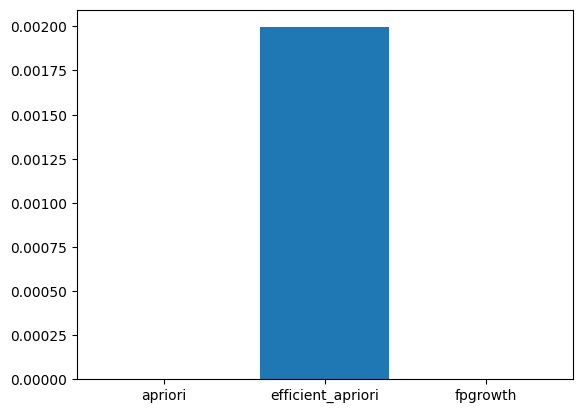

In [41]:

plt.bar(['apriori','efficient_apriori','fpgrowth'],time_walk)
plt.show()

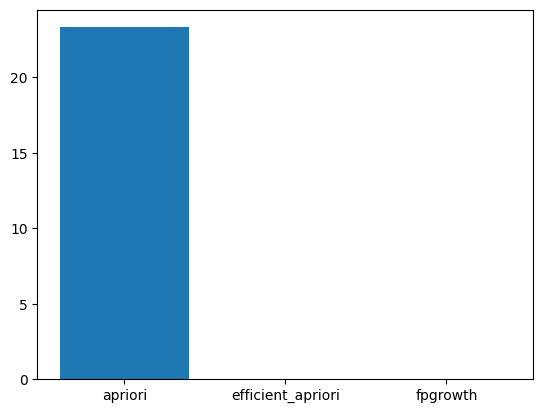

In [42]:
plt.bar(['apriori','efficient_apriori','fpgrowth'],time_walk_git)
plt.show()